In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
game = pd.read_csv('game_filtrado.csv')

In [191]:
game

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,game_minutes,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,dreb_home,reb_home,ast_home,stl_home,blk_home,tov_home,pf_home,pts_home,plus_minus_home,team_id_away,team_abbreviation_away,team_name_away,matchup_away,wl_away,fgm_away,fga_away,fg_pct_away,fg3m_away,fg3a_away,fg3_pct_away,ftm_away,fta_away,ft_pct_away,oreb_away,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,season_type
0,2021,1610612764,WAS,Washington Wizards,22000063,2020-12-31,WAS vs. CHI,L,240,42.0,84.0,0.500,14.0,29.0,0.483,32.0,41.0,0.780,9.0,28.0,37.0,27.0,8.0,4.0,14.0,27.0,130.0,-3,1610612741,CHI,Chicago Bulls,CHI @ WAS,W,50.0,92.0,0.543,14.0,36.0,0.389,19.0,25.0,0.760,9.0,35.0,44.0,34.0,9.0,3.0,17.0,27.0,133.0,3,Regular Season
1,2021,1610612762,UTA,Utah Jazz,22000068,2020-12-31,UTA vs. PHX,L,240,35.0,84.0,0.417,12.0,34.0,0.353,13.0,19.0,0.684,10.0,36.0,46.0,16.0,8.0,3.0,14.0,15.0,95.0,-11,1610612756,PHX,Phoenix Suns,PHX @ UTA,W,41.0,84.0,0.488,17.0,33.0,0.515,7.0,10.0,0.700,5.0,36.0,41.0,26.0,5.0,6.0,15.0,17.0,106.0,11,Regular Season
2,2021,1610612745,HOU,Houston Rockets,22000065,2020-12-31,HOU vs. SAC,W,240,45.0,86.0,0.523,13.0,36.0,0.361,19.0,25.0,0.760,10.0,35.0,45.0,26.0,10.0,6.0,18.0,14.0,122.0,3,1610612758,SAC,Sacramento Kings,SAC @ HOU,L,45.0,96.0,0.469,11.0,33.0,0.333,18.0,24.0,0.750,14.0,31.0,45.0,23.0,11.0,5.0,15.0,21.0,119.0,-3,Regular Season
3,2021,1610612753,ORL,Orlando Magic,22000064,2020-12-31,ORL vs. PHI,L,240,33.0,95.0,0.347,7.0,28.0,0.250,19.0,21.0,0.905,10.0,38.0,48.0,17.0,2.0,5.0,11.0,15.0,92.0,-24,1610612755,PHI,Philadelphia 76ers,PHI @ ORL,W,44.0,91.0,0.484,15.0,33.0,0.455,13.0,15.0,0.867,7.0,47.0,54.0,23.0,7.0,10.0,15.0,23.0,116.0,24,Regular Season
4,2021,1610612760,OKC,Oklahoma City Thunder,22000067,2020-12-31,OKC vs. NOP,L,240,30.0,80.0,0.375,15.0,48.0,0.313,5.0,15.0,0.333,7.0,33.0,40.0,24.0,6.0,3.0,19.0,20.0,80.0,-33,1610612740,NOP,New Orleans Pelicans,NOP @ OKC,W,44.0,91.0,0.484,13.0,36.0,0.361,12.0,19.0,0.632,14.0,44.0,58.0,23.0,9.0,4.0,13.0,16.0,113.0,33,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,2023,1610612743,DEN,Denver Nuggets,42200402,2023-06-04,DEN vs. MIA,L,240,39.0,75.0,0.520,11.0,28.0,0.393,19.0,22.0,0.864,9.0,29.0,38.0,23.0,7.0,2.0,14.0,21.0,108.0,-3,1610612748,MIA,Miami Heat,MIA @ DEN,W,38.0,78.0,0.487,17.0,35.0,0.486,18.0,20.0,0.900,8.0,23.0,31.0,28.0,5.0,4.0,11.0,22.0,111.0,3,Playoffs
3871,2023,1610612748,MIA,Miami Heat,42200403,2023-06-07,MIA vs. DEN,L,240,34.0,92.0,0.370,11.0,35.0,0.314,15.0,19.0,0.789,10.0,23.0,33.0,20.0,7.0,3.0,4.0,22.0,94.0,-15,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,41.0,80.0,0.513,5.0,18.0,0.278,22.0,27.0,0.815,13.0,45.0,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,Playoffs
3872,2023,1610612748,MIA,Miami Heat,42200404,2023-06-09,MIA vs. DEN,L,240,35.0,78.0,0.449,8.0,25.0,0.320,17.0,20.0,0.850,8.0,29.0,37.0,23.0,2.0,3.0,15.0,19.0,95.0,-13,1610612743,DEN,Denver Nuggets,DEN @ MIA,W,39.0,79.0,0.494,14.0,28.0,0.500,16.0,21.0,0.762,5.0,29.0,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,Playoffs
3873,2023,1610612743,DEN,Denver Nuggets,42200405,2023-06-12,DEN vs. MIA,W,240,38.0,84.0,0.452,5.0,28.0,0.179,13.0,23.0,0.565,11.0,46.0,57.0,21.0,6.0,7.0,15.0,13.0,94.0,5,1610612748,MIA,Miami Heat,MIA @ DEN,L,33.0,96.0,0.344,9.0,35.0,0.257,14.0,16.0,0.875,11.0,33.0,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,Playoffs


In [192]:
game.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'game_minutes',
       'fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
       'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
       'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
       'pf_home', 'pts_home', 'plus_minus_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'season_type'],
      dtype='object')

In [193]:
# Primero, vamos a seleccionar solo las columnas que necesitamos para la agrupación y suma

# Crear un DataFrame con las estadísticas del equipo local
df_home = game[['season_id', 'team_id_home', 'team_abbreviation_home', 
              'fgm_home', 'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home',
              'fg3_pct_home', 'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home',
              'dreb_home', 'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home',
              'pf_home', 'pts_home', 'plus_minus_home']].copy()

# Cambiar los nombres de las columnas para que sean consistentes
df_home.columns = ['season_id', 'team_id', 'team_abbreviation', 
                   'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a',
                   'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb',
                   'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
                   'pf', 'pts', 'plus_minus']

# Repetir el proceso para el equipo visitante
df_away = game[['season_id', 'team_id_away', 'team_abbreviation_away', 
              'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
              'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
              'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
              'pf_away', 'pts_away', 'plus_minus_away']].copy()

df_away.columns = ['season_id', 'team_id', 'team_abbreviation', 
                   'fgm', 'fga', 'fg_pct', 'fg3m', 'fg3a',
                   'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb',
                   'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
                   'pf', 'pts', 'plus_minus']

# Concatenar los DataFrames de home y away
df_combined = pd.concat([df_home, df_away])

# Agrupar por season_id y team_id, y sumar las estadísticas
df_season_team = df_combined.groupby(['season_id', 'team_id', 'team_abbreviation']).sum().reset_index()

# Ahora df_season_team contiene los totales de estadísticas por temporada para cada equipo

In [194]:
df_season_team

,season_id,team_id,team_abbreviation,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus
0,2021,1610612737,ATL,3470.0,7493.0,39.946,1041.0,2858.0,31.194,1603.0,1987.0,69.466,878.0,2971.0,3849.0,1997.0,604.0,404.0,1114.0,1684.0,9584.0,106
1,2021,1610612738,BOS,2963.0,6393.0,33.427,983.0,2650.0,26.833,1195.0,1528.0,56.355,770.0,2414.0,3184.0,1679.0,534.0,386.0,1007.0,1478.0,8104.0,53
2,2021,1610612739,CLE,2604.0,5810.0,30.533,677.0,2026.0,22.738,1138.0,1526.0,50.599,709.0,2180.0,2889.0,1600.0,508.0,302.0,1045.0,1223.0,7023.0,-639
3,2021,1610612740,NOP,2914.0,6083.0,32.685,725.0,2065.0,23.906,1303.0,1778.0,49.842,806.0,2424.0,3230.0,1791.0,505.0,299.0,980.0,1228.0,7856.0,0
4,2021,1610612741,CHI,2883.0,6029.0,32.621,848.0,2295.0,24.847,902.0,1142.0,53.791,660.0,2408.0,3068.0,1831.0,454.0,287.0,1014.0,1280.0,7516.0,-32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023,1610612764,WAS,3595.0,7476.0,41.510,961.0,2745.0,30.069,1515.0,1937.0,67.489,810.0,2934.0,3744.0,2178.0,600.0,455.0,1214.0,1630.0,9666.0,-124
94,2023,1610612765,DET,3383.0,7493.0,38.867,988.0,2838.0,29.743,1698.0,2202.0,66.410,960.0,2706.0,3666.0,1974.0,593.0,330.0,1315.0,1917.0,9452.0,-732
95,2023,1610612766,CHA,3569.0,7875.0,39.602,917.0,2826.0,28.195,1537.0,2063.0,64.839,972.0,2917.0,3889.0,2154.0,677.0,456.0,1247.0,1766.0,9592.0,-601
96,2023,1610616833,GNS,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9


In [195]:
# Obtener los valores únicos de la columna team_abbreviation
valores_unicos = df_season_team['team_abbreviation'].unique()

# Mostrar los valores únicos
print(valores_unicos)

['ATL' 'BOS' 'CLE' 'NOP' 'CHI' 'DAL' 'DEN' 'GSW' 'HOU' 'LAC' 'LAL' 'MIA'
 'MIL' 'MIN' 'BKN' 'NYK' 'ORL' 'IND' 'PHI' 'PHX' 'POR' 'SAC' 'SAS' 'OKC'
 'TOR' 'UTA' 'MEM' 'WAS' 'DET' 'CHA' 'DRT' 'LBN' 'ADL' 'MRA' 'GNS']


In [196]:
# Ajustar las opciones de Pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', 10)  # Muestra hasta 100 filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas


In [197]:
# Crear una nueva columna para la métrica
df_season_team['pie_denominador'] = (
    df_season_team['pts'] + 
    df_season_team['fgm'] + 
    df_season_team['ftm'] - 
    df_season_team['fga'] - 
    df_season_team['fta'] + 
    df_season_team['dreb'] + 
    df_season_team['oreb'] / 2 + 
    df_season_team['ast'] + 
    df_season_team['stl'] + 
    df_season_team['blk'] / 2 - 
    df_season_team['pf'] - 
    df_season_team['tov']
)

# Mostrar las primeras filas para verificar
print(df_season_team[['team_abbreviation', 'pie_denominador']].head(5))

  team_abbreviation  pie_denominador
0               ATL           8592.0
1               BOS           7061.0
2               CLE           5954.5
3               NOP           7276.5
4               CHI           7002.5


In [198]:
df_season_team

,season_id,team_id,team_abbreviation,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,dreb,reb,ast,stl,blk,tov,pf,pts,plus_minus,pie_denominador
0,2021,1610612737,ATL,3470.0,7493.0,39.946,1041.0,2858.0,31.194,1603.0,1987.0,69.466,878.0,2971.0,3849.0,1997.0,604.0,404.0,1114.0,1684.0,9584.0,106,8592.0
1,2021,1610612738,BOS,2963.0,6393.0,33.427,983.0,2650.0,26.833,1195.0,1528.0,56.355,770.0,2414.0,3184.0,1679.0,534.0,386.0,1007.0,1478.0,8104.0,53,7061.0
2,2021,1610612739,CLE,2604.0,5810.0,30.533,677.0,2026.0,22.738,1138.0,1526.0,50.599,709.0,2180.0,2889.0,1600.0,508.0,302.0,1045.0,1223.0,7023.0,-639,5954.5
3,2021,1610612740,NOP,2914.0,6083.0,32.685,725.0,2065.0,23.906,1303.0,1778.0,49.842,806.0,2424.0,3230.0,1791.0,505.0,299.0,980.0,1228.0,7856.0,0,7276.5
4,2021,1610612741,CHI,2883.0,6029.0,32.621,848.0,2295.0,24.847,902.0,1142.0,53.791,660.0,2408.0,3068.0,1831.0,454.0,287.0,1014.0,1280.0,7516.0,-32,7002.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2023,1610612764,WAS,3595.0,7476.0,41.510,961.0,2745.0,30.069,1515.0,1937.0,67.489,810.0,2934.0,3744.0,2178.0,600.0,455.0,1214.0,1630.0,9666.0,-124,8863.5
94,2023,1610612765,DET,3383.0,7493.0,38.867,988.0,2838.0,29.743,1698.0,2202.0,66.410,960.0,2706.0,3666.0,1974.0,593.0,330.0,1315.0,1917.0,9452.0,-732,7524.0
95,2023,1610612766,CHA,3569.0,7875.0,39.602,917.0,2826.0,28.195,1537.0,2063.0,64.839,972.0,2917.0,3889.0,2154.0,677.0,456.0,1247.0,1766.0,9592.0,-601,8209.0
96,2023,1610616833,GNS,76.0,123.0,0.618,29.0,66.0,0.439,3.0,4.0,0.750,10.0,36.0,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,214.5


In [199]:
df_season_team.columns

Index(['season_id', 'team_id', 'team_abbreviation', 'fgm', 'fga', 'fg_pct',
       'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb',
       'reb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus',
       'pie_denominador'],
      dtype='object')

In [200]:
team = pd.read_csv('team_completo_filtrado.csv')

In [201]:
team.columns

Index(['team_id', 'full_name', 'team_abbreviation', 'nickname', 'city',
       'state', 'year_founded', 'arena', 'arenacapacity', 'headcoach'],
      dtype='object')

In [202]:
np.shape(team)

(30, 10)

In [203]:
# Filtrar el DataFrame para conservar solo las filas con 'pie_denominador' >= 4000
df_filtrado = df_season_team[df_season_team['pie_denominador'] >= 4000]

# Mostrar el DataFrame filtrado
np.shape(df_filtrado)

(90, 23)

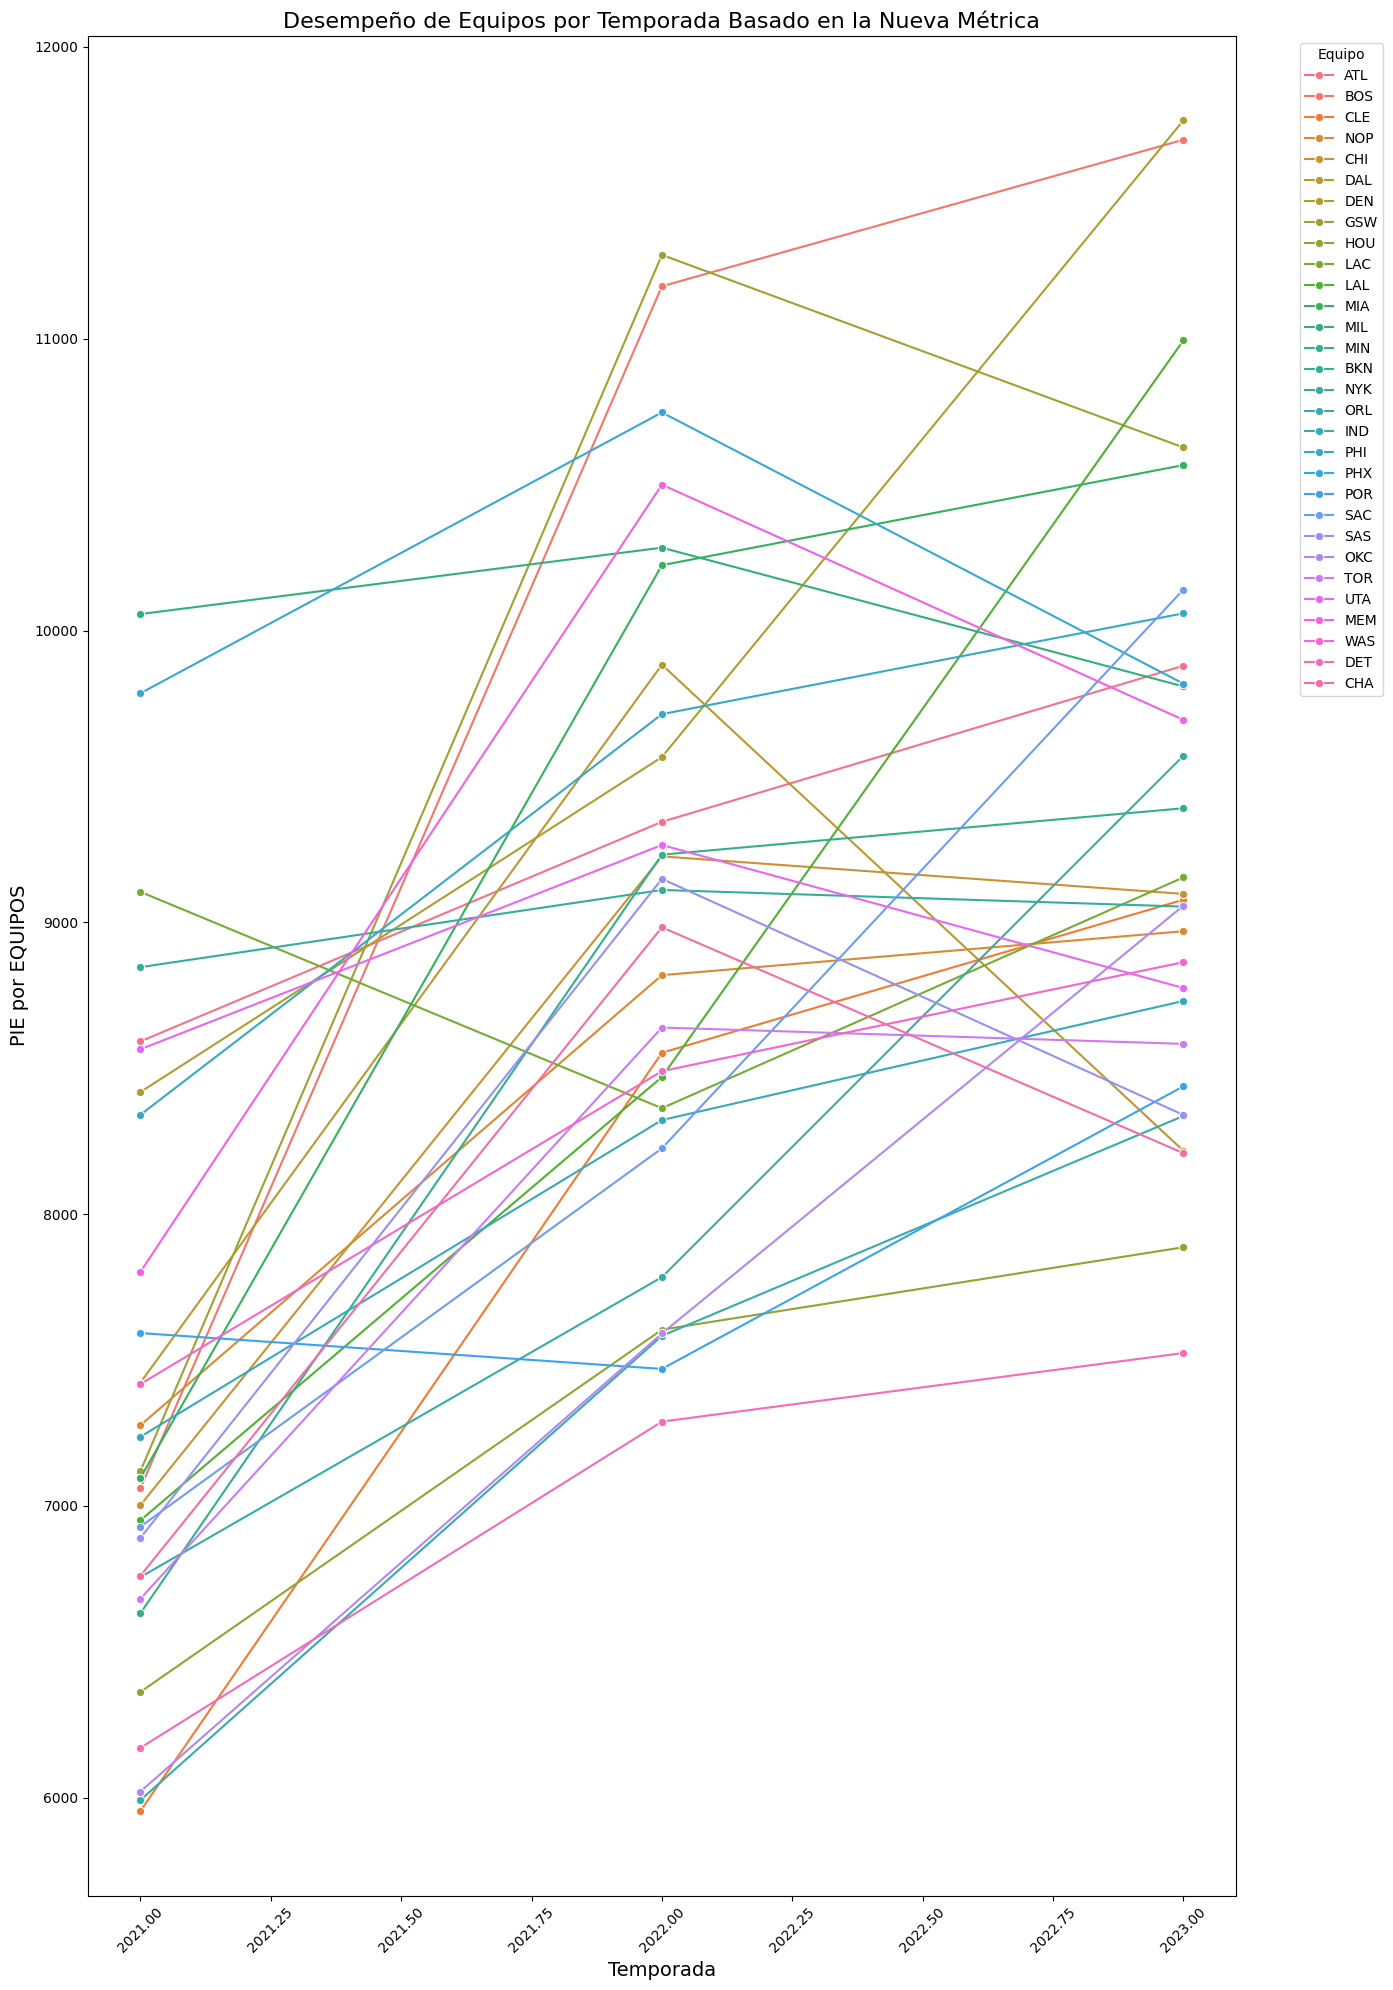

In [204]:
# Ajustar el tamaño del gráfico
plt.figure(figsize=(14, 20))

# Crear el gráfico de líneas
sns.lineplot(data=df_filtrado, x='season_id', y='pie_denominador', hue='team_abbreviation', marker='o')

# Agregar título y etiquetas
plt.title('Desempeño de Equipos por Temporada Basado en la Nueva Métrica', fontsize=16)
plt.xlabel('Temporada', fontsize=14)
plt.ylabel('PIE por EQUIPOS', fontsize=14)

# Ajustar las etiquetas del eje x para que no se superpongan
plt.xticks(rotation=45)

# Mostrar la leyenda fuera del gráfico
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [205]:
# Obtener los valores únicos de 'team_id' en ambos DataFrames
team_ids_df1 = set(df_filtrado['team_id'].unique())
team_ids_df2 = set(team['team_id'].unique())

# Encontrar los team_id que están en df1 pero no en df2
team_ids_only_in_df1 = team_ids_df1 - team_ids_df2

# Encontrar los team_id que están en df2 pero no en df1
team_ids_only_in_df2 = team_ids_df2 - team_ids_df1

# Encontrar los team_id que están en ambos DataFrames
team_ids_in_both = team_ids_df1 & team_ids_df2

# Mostrar los resultados
print(f"Team IDs solo en df1: {team_ids_only_in_df1}")
print(f"Team IDs solo en df2: {team_ids_only_in_df2}")
print(f"Team IDs en ambos datasets: {team_ids_in_both}")


Team IDs solo en df1: set()
Team IDs solo en df2: set()
Team IDs en ambos datasets: {np.int64(1610612737), np.int64(1610612738), np.int64(1610612739), np.int64(1610612740), np.int64(1610612741), np.int64(1610612742), np.int64(1610612743), np.int64(1610612744), np.int64(1610612745), np.int64(1610612746), np.int64(1610612747), np.int64(1610612748), np.int64(1610612749), np.int64(1610612750), np.int64(1610612751), np.int64(1610612752), np.int64(1610612753), np.int64(1610612754), np.int64(1610612755), np.int64(1610612756), np.int64(1610612757), np.int64(1610612758), np.int64(1610612759), np.int64(1610612760), np.int64(1610612761), np.int64(1610612762), np.int64(1610612763), np.int64(1610612764), np.int64(1610612765), np.int64(1610612766)}


In [206]:
df_filtrado.columns

Index(['season_id', 'team_id', 'team_abbreviation', 'fgm', 'fga', 'fg_pct',
       'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb',
       'reb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus',
       'pie_denominador'],
      dtype='object')

In [207]:
df_filtrado.to_csv('team_stats_filtrado.csv', index=False)

In [208]:
player = pd.read_csv('player_final_merged_with_stats_sinTOT.csv')

In [209]:
player

,primary_key_composed,player_id,player_name,position,age,team_abbreviation,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season_id
0,1471_2021_MIA,1471,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,2.6,4.4,0.590,0.590,1.3,2.4,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5,2021
1,2_2021_MIL,2,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,0.2,1.0,0.167,0.125,0.0,0.0,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3,2021
2,1274_2021_NOP,1274,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,3.5,5.7,0.606,0.603,1.1,2.3,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0,2021
3,1243_2021_MIA,1243,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,7.3,12.7,0.576,0.576,5.1,6.0,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9,2021
4,494_2021_SAS,494,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,4.6,8.8,0.525,0.529,0.9,1.2,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1667_2023_POR,1667,Justin Minaya,SF,23,POR,4,0,22.3,1.8,5.8,0.304,0.8,3.0,0.250,1.0,2.8,0.364,0.370,0.0,0.3,0.000,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,2023
1667,1668_2023_CHO,1668,Kobi Simmons,SG,25,CHO,5,0,5.6,0.2,1.2,0.167,0.2,1.0,0.200,0.0,0.2,0.000,0.250,0.4,0.4,1.000,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,2023
1668,1669_2023_IND,1669,Gabe York,SG,29,IND,3,0,18.7,2.7,7.0,0.381,2.0,6.0,0.333,0.7,1.0,0.667,0.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,2023
1669,1670_2023_BRK,1670,RaiQuan Gray,PF,23,BRK,1,0,35.0,6.0,12.0,0.500,2.0,5.0,0.400,4.0,7.0,0.571,0.583,2.0,2.0,1.000,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,2023


In [210]:
player.columns

Index(['primary_key_composed', 'player_id', 'player_name', 'position', 'age',
       'team_abbreviation', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season_id'],
      dtype='object')

In [211]:
# Restablecer el formato de visualización de floats a la configuración por defecto
pd.options.display.float_format = None

In [212]:
# Crear la columna 'divisor_pie' aplicando la fórmula dada
player['divisor_pie'] = (
    player['PTS'] + 
    player['FG'] + 
    player['FT'] - 
    player['FGA'] - 
    player['FTA'] + 
    player['DRB'] + 
    player['ORB'] / 2 + 
    player['AST'] + 
    player['STL'] + 
    player['BLK'] / 2 - 
    player['PF'] - 
    player['TOV']
)

# Mostrar las primeras filas para verificar
print(player[['player_name', 'divisor_pie']].head())

         player_name  divisor_pie
0   Precious Achiuwa         5.30
1       Jaylen Adams        -0.20
2       Steven Adams        11.05
3        Bam Adebayo        22.95
4  LaMarcus Aldridge        11.45


In [213]:
player.columns

Index(['primary_key_composed', 'player_id', 'player_name', 'position', 'age',
       'team_abbreviation', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season_id',
       'divisor_pie'],
      dtype='object')

In [214]:
df_filtrado.columns

Index(['season_id', 'team_id', 'team_abbreviation', 'fgm', 'fga', 'fg_pct',
       'fg3m', 'fg3a', 'fg3_pct', 'ftm', 'fta', 'ft_pct', 'oreb', 'dreb',
       'reb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus',
       'pie_denominador'],
      dtype='object')

In [215]:
# Obtener los valores únicos de la columna team_abbreviation
valores_unicos = team['team_abbreviation'].unique()

# Mostrar los valores únicos
print(valores_unicos)

['ATL' 'BOS' 'CLE' 'NOP' 'CHI' 'DAL' 'DEN' 'GSW' 'HOU' 'LAC' 'LAL' 'MIA'
 'MIL' 'MIN' 'BKN' 'NYK' 'ORL' 'IND' 'PHI' 'PHX' 'POR' 'SAC' 'SAS' 'OKC'
 'TOR' 'UTA' 'MEM' 'WAS' 'DET' 'CHA']


In [216]:
# Obtener los valores únicos de la columna team_abbreviation
valores_unicos = df_filtrado['team_abbreviation'].unique()

# Mostrar los valores únicos
print(valores_unicos)

['ATL' 'BOS' 'CLE' 'NOP' 'CHI' 'DAL' 'DEN' 'GSW' 'HOU' 'LAC' 'LAL' 'MIA'
 'MIL' 'MIN' 'BKN' 'NYK' 'ORL' 'IND' 'PHI' 'PHX' 'POR' 'SAC' 'SAS' 'OKC'
 'TOR' 'UTA' 'MEM' 'WAS' 'DET' 'CHA']


In [217]:
# Obtener los valores únicos de la columna team_abbreviation
valores_unicos = player['team_abbreviation'].unique()

# Mostrar los valores únicos
print(valores_unicos)

['MIA' 'MIL' 'NOP' 'SAS' 'PHO' 'MEM' 'BRK' 'CLE' 'ORL' 'LAL' 'POR' 'TOR'
 'CHI' 'WAS' 'UTA' 'SAC' 'CHO' 'NYK' 'DEN' 'LAC' 'GSW' 'OKC' 'MIN' 'DET'
 'DAL' 'IND' 'ATL' 'PHI' 'BOS' 'HOU']


In [218]:
# Cambiar la abreviatura del equipo
# Convertir la columna a tipo str si no lo es
player['team_abbreviation'] = player['team_abbreviation'].astype(str)
# Eliminar espacios en blanco al principio y al final de los valores
player['team_abbreviation'] = player['team_abbreviation'].str.strip()
player['team_abbreviation'] = player['team_abbreviation'].replace('BRK', 'BKN')
player['team_abbreviation'] = player['team_abbreviation'].replace('CHO', 'CHA')
player['team_abbreviation'] = player['team_abbreviation'].replace('PHO', 'PHX')
#player.loc[player['team_abbreviation'] == 'BRK', 'team_abbreviation'] = 'BKN'
#player.loc[player['team_abbreviation'] == 'CHO', 'team_abbreviation'] = 'CHA'
#player.loc[player['team_abbreviation'] == 'PHO', 'team_abbreviation'] = 'PHX'

In [219]:
# Obtener los valores únicos de la columna team_abbreviation
valores_unicos = df_filtrado['team_abbreviation'].unique()

# Mostrar los valores únicos
print(valores_unicos)


['ATL' 'BOS' 'CLE' 'NOP' 'CHI' 'DAL' 'DEN' 'GSW' 'HOU' 'LAC' 'LAL' 'MIA'
 'MIL' 'MIN' 'BKN' 'NYK' 'ORL' 'IND' 'PHI' 'PHX' 'POR' 'SAC' 'SAS' 'OKC'
 'TOR' 'UTA' 'MEM' 'WAS' 'DET' 'CHA']


In [220]:
# Obtener los valores únicos de la columna team_abbreviation
valores_unicos = player['team_abbreviation'].unique()

# Mostrar los valores únicos
print(valores_unicos)

['MIA' 'MIL' 'NOP' 'SAS' 'PHX' 'MEM' 'BKN' 'CLE' 'ORL' 'LAL' 'POR' 'TOR'
 'CHI' 'WAS' 'UTA' 'SAC' 'CHA' 'NYK' 'DEN' 'LAC' 'GSW' 'OKC' 'MIN' 'DET'
 'DAL' 'IND' 'ATL' 'PHI' 'BOS' 'HOU']


In [221]:
# Unir los datasets en base a 'season_id' y 'team_abbreviation'
df_combined = pd.merge(player, df_filtrado[['season_id','team_id', 'team_abbreviation', 'pie_denominador']], 
                       on=['season_id', 'team_abbreviation'], 
                       how='inner')

# Crear la nueva columna dividiendo 'divisor_pie' por 'pie_denominador'
df_combined['pie'] = df_combined['divisor_pie'] / df_combined['pie_denominador']

# Mostrar las primeras filas del DataFrame combinado
df_combined

,primary_key_composed,player_id,player_name,position,age,team_abbreviation,GP,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season_id,divisor_pie,team_id,pie_denominador,pie
0,1471_2021_MIA,1471,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,0.0,0.0,0.000,2.6,4.4,0.590,0.590,1.3,2.4,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5,2021,5.30,1610612748,7096.0,0.000747
1,2_2021_MIL,2,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,0.0,0.3,0.000,0.2,1.0,0.167,0.125,0.0,0.0,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3,2021,-0.20,1610612749,10056.5,-0.000020
2,1274_2021_NOP,1274,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,0.0,0.0,0.000,3.5,5.7,0.606,0.603,1.1,2.3,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0,2021,11.05,1610612740,7276.5,0.001519
3,1243_2021_MIA,1243,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,0.1,0.2,0.400,7.3,12.7,0.576,0.576,5.1,6.0,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9,2021,22.95,1610612748,7096.0,0.003234
4,494_2021_SAS,494,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,1.3,3.7,0.358,4.6,8.8,0.525,0.529,0.9,1.2,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1,2021,11.45,1610612759,6890.5,0.001662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,1667_2023_POR,1667,Justin Minaya,SF,23,POR,4,0,22.3,1.8,5.8,0.304,0.8,3.0,0.250,1.0,2.8,0.364,0.370,0.0,0.3,0.000,0.8,3.0,3.8,1.0,0.5,1.3,1.0,2.3,4.3,2023,2.25,1610612757,8438.0,0.000267
1667,1668_2023_CHO,1668,Kobi Simmons,SG,25,CHA,5,0,5.6,0.2,1.2,0.167,0.2,1.0,0.200,0.0,0.2,0.000,0.250,0.4,0.4,1.000,0.2,0.6,0.8,1.0,0.0,0.4,0.2,0.0,1.0,2023,1.70,1610612766,8209.0,0.000207
1668,1669_2023_IND,1669,Gabe York,SG,29,IND,3,0,18.7,2.7,7.0,0.381,2.0,6.0,0.333,0.7,1.0,0.667,0.524,0.7,0.7,1.000,0.0,2.0,2.0,1.7,0.7,0.0,0.0,1.7,8.0,2023,6.40,1610612754,8730.5,0.000733
1669,1670_2023_BRK,1670,RaiQuan Gray,PF,23,BKN,1,0,35.0,6.0,12.0,0.500,2.0,5.0,0.400,4.0,7.0,0.571,0.583,2.0,2.0,1.000,3.0,6.0,9.0,7.0,0.0,1.0,4.0,5.0,16.0,2023,16.00,1610612751,9054.0,0.001767


In [222]:
df_combined['pie'].describe()

count    1671.000000
mean        0.000900
std         0.000749
min        -0.000876
25%         0.000328
50%         0.000737
75%         0.001280
max         0.004097
Name: pie, dtype: float64

In [223]:
df_combined = df_combined.drop('pie_denominador', axis=1)

In [224]:
df_combined.columns

Index(['primary_key_composed', 'player_id', 'player_name', 'position', 'age',
       'team_abbreviation', 'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season_id',
       'divisor_pie', 'team_id', 'pie'],
      dtype='object')

In [225]:
df_combined = df_combined.reindex(['primary_key_composed', 'season_id', 'player_id', 'player_name', 'team_id','team_abbreviation', 'position', 'age',
                            'GP', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'divisor_pie', 'pie'], axis=1)

In [226]:
df_combined.columns

Index(['primary_key_composed', 'season_id', 'player_id', 'player_name',
       'team_id', 'team_abbreviation', 'position', 'age', 'GP', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'divisor_pie', 'pie'],
      dtype='object')

In [227]:
df_combined.to_csv('player_stats_ultimate.csv', index=False)